## Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

##### The IRIS dataset is already normalized, hence no need for normalization

In [2]:
class KNN:
    def __init__(self, data):
        self.data = data.data
        self.target = data.target
        
    def split(self):
        X = self.data
        Y = self.target
        from sklearn.model_selection import train_test_split

        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        print(f"The training set size is: {X_train.shape}, {y_train.shape}")
        print(f"The testing set size is: {X_test.shape}, {y_test.shape}")

        return X_train, X_test, y_train, y_test
    
    def fitKNN(self):
        X_train, X_test, y_train, y_test = self.split()
        
        from sklearn.neighbors import KNeighborsClassifier
        
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        
        self.predict_metrics(knn, X_test, y_test)
    
    
    def predict_metrics(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        
        from sklearn.metrics import confusion_matrix

        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        
        from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

        acc = accuracy_score(y_test, y_pred)

        print(f"The accuracy is :{acc}")

In [3]:
model = KNN(load_iris())
model.fitKNN()

The training set size is: (105, 4), (105,)
The testing set size is: (45, 4), (45,)
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
The accuracy is :1.0


## Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
X = df.drop(labels=["medv"], axis=1)
Y = df["medv"]

In [8]:
from sklearn.model_selection import train_test_split
        
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"The training set size is: {X_train.shape}, {y_train.shape}")
print(f"The testing set size is: {X_test.shape}, {y_test.shape}")

The training set size is: (354, 13), (354,)
The testing set size is: (152, 13), (152,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X_train,y_train,cv=5,scoring='r2')
scores

array([0.70757722, 0.6421702 , 0.71614969, 0.71381021, 0.72490399])

In [12]:
cval_score = np.mean(scores)
print(f'Mean Cross Validation R2 Score is : {cval_score:.4f}')

Mean Cross Validation R2 Score is : 0.7009


In [13]:
y_pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
r2 = r2_score(y_test, y_pred)

print(f'Testing MAE  : {mae:.2f}')
print(f'Testing MSE  : {mse:.2f}')
print(f'Testing RMSE : {rmse:.2f}')
print(f'Testing R2   : {r2:.4f}')

Testing MAE  : 2.63
Testing MSE  : 18.84
Testing RMSE : 4.34
Testing R2   : 0.7472


## Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.

In [15]:
iris = load_iris()
X, Y = iris.data, iris.target

In [16]:
from sklearn.model_selection import train_test_split
        
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"The training set size is: {X_train.shape}, {y_train.shape}")
print(f"The testing set size is: {X_test.shape}, {y_test.shape}")

The training set size is: (105, 4), (105,)
The testing set size is: (45, 4), (45,)


In [17]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [20]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}

In [21]:
optimal_k = cv.best_params_['n_neighbors']
optimal_score = cv.best_score_

print(f"Optimal value of K: {optimal_k}")
print(f"Mean cross-validation score for optimal K: {optimal_score:.4f}")

Optimal value of K: 18
Mean cross-validation score for optimal K: 0.9619


In [22]:
y_pred = cv.predict(X_test)

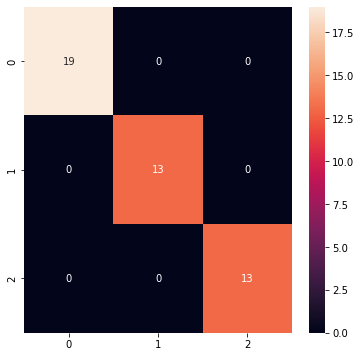

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt='d')
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

In [25]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1)

In [26]:
X, Y = boston.data, boston.target

In [27]:
from sklearn.model_selection import train_test_split
        
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"The training set size is: {X_train.shape}, {y_train.shape}")
print(f"The testing set size is: {X_test.shape}, {y_test.shape}")

The training set size is: (354, 13), (354,)
The testing set size is: (152, 13), (152,)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

In [30]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [31]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv=5, scoring="r2", verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.819 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.507 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.791 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.856 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.665 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.819 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.507 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 4

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.755 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.789 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, weights=uniform;, score=0.702 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, weights=uniform;, score=0.692 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, weights=uniform;, score=0.683 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, weights=uniform;, score=0.712 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=6, p=1, we

[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.754 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.734 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=uniform;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.796 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=10, p=1, weights=distance;, score=0.627 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=10,

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=uniform;, score=0.673 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=uniform;, score=0.713 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=distance;, score=0.783 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=distance;, score=0.617 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=distance;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=13, p=2, weights=distance;, score=0.744 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=uniform;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=uniform;, score=0.711 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=uniform;, score=0.685 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=distance;, score=0.773 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=distance;, score=0.690 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=distance;, score=0.755 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=18, p=1, weights=distance;, score=0.731 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=uniform;, score=0.706 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=uniform;, score=0.649 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=0.747 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=0.619 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=0.747 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=0.700 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=

[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=26, p=2, weights=distance;, score=0.739 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=26, p=2, weights=distance;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=0.657 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=0.592 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=0.693 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=0.619 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=27

[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=uniform;, score=0.793 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=uniform;, score=0.542 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=uniform;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=uniform;, score=0.838 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=uniform;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=distance;, score=0.808 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=distance;, score=0.543 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, weights=distance;, score=0.777 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=2, p=2, we

[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=1, weights=distance;, score=0.753 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=1, weights=distance;, score=0.804 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=1, weights=distance;, score=0.759 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, weights=uniform;, score=0.744 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, weights=uniform;, score=0.620 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, weights=uniform;, score=0.706 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, weights=uniform;, score=0.724 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, weights=uniform;, score=0.697 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=6, p=2, we

[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.651 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.689 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=uniform;, score=0.638 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.792 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.621 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=10, p=2, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=1

[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=uniform;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=uniform;, score=0.631 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=uniform;, score=0.600 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=uniform;, score=0.686 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=uniform;, score=0.629 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=distance;, score=0.639 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=14, p=2, weights=distance;, score=0.670 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=14

[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=distance;, score=0.758 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=distance;, score=0.638 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=distance;, score=0.651 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=distance;, score=0.747 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=18, p=2, weights=distance;, score=0.691 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=19, p=1, weights=uniform;, score=0.657 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=19, p=1, weights=uniform;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=

[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=22, p=2, weights=distance;, score=0.626 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=22, p=2, weights=distance;, score=0.624 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=22, p=2, weights=distance;, score=0.732 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=22, p=2, weights=distance;, score=0.686 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=23, p=1, weights=uniform;, score=0.644 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=23, p=1, weights=uniform;, score=0.611 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=23, p=1, weights=uniform;, score=0.548 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=23, p=1, weights=uniform;, score=0.669 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=2

[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=26, p=2, weights=distance;, score=0.607 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=26, p=2, weights=distance;, score=0.724 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=26, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=27, p=1, weights=uniform;, score=0.612 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=27, p=1, weights=uniform;, score=0.597 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=27, p=1, weights=uniform;, score=0.538 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=27, p=1, weights=uniform;, score=0.656 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=27, p=1, weights=uniform;, score=0.596 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=27

[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.697 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.585 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.719 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=30, p=2, weights=distance;, score=0.641 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.819 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.507 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.791 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclid

[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=4, p=2, weights=distance;, score=0.764 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.708 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.642 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.716 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.714 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.725 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.805 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.648 total time=   0.0s
[CV 3/5] END algorithm=ball_t

[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.717 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.690 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.798 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.629 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.724 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.754 total time=   0.0s
[CV 1/5] END algorithm=ball

[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=uniform;, score=0.689 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=distance;, score=0.783 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=distance;, score=0.617 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=distance;, score=0.765 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=1, weights=distance;, score=0.744 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=2, weights=uniform;, score=0.718 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=13, p=2, weights=uniform;, score=0.600 total time=   0.0s
[CV 3/5] END algori

[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=uniform;, score=0.711 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=uniform;, score=0.664 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=uniform;, score=0.713 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=uniform;, score=0.675 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=distance;, score=0.775 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=17, p=2, weights=distance;, score=0.618 total time=   0.0s
[CV 3/5] END algorith

[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=uniform;, score=0.704 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=uniform;, score=0.669 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=distance;, score=0.755 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=distance;, score=0.623 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=distance;, score=0.674 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=distance;, score=0.748 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=21, p=2, weights=distance;, score=0.717 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=22, p=1, weights=uniform;, score=0.685 total time=   0.0s
[CV 2/5] END algori

[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.610 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.657 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.740 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=25, p=2, weights=distance;, score=0.693 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=26, p=1, weights=uniform;, score=0.655 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=26, p=1, weights=uniform;, score=0.580 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=26, p=1, weights=uniform;, score=0.600 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=26, p=1, weights=uniform;, score=0.697 total time=   0.0s
[CV 5/5] END algorit

[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=distance;, score=0.719 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=distance;, score=0.597 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=distance;, score=0.637 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=distance;, score=0.732 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=29, p=2, weights=distance;, score=0.666 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.641 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=30, p=1, weights=uniform;, score=0.563 total time=   0.0s
[CV 3/5] END algori

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=uniform;, score=0.802 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=uniform;, score=0.773 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=distance;, score=0.813 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=distance;, score=0.666 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=distance;, score=0.839 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=1, weights=distance;, score=0.797 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=4, p=2, weights=uniform;, score=0.769 total time=   0.0s
[CV 2/5] END algorithm=ball

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=uniform;, score=0.698 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=uniform;, score=0.681 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=distance;, score=0.805 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=distance;, score=0.745 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=distance;, score=0.778 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=8, p=2, weights=distance;, score=0.746 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.713 total time=   0.0s
[CV 2/5] END algorithm=ball

[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.605 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.679 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=uniform;, score=0.631 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=0.780 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=0.637 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=0.676 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=0.706 total time=   0.0s
[CV 1/5] END algori

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=0.640 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=0.654 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=0.754 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=2, weights=uniform;, score=0.663 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=2, weights=uniform;, score=0.630 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=17, p=2, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END algori

[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=0.632 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=0.735 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=0.695 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.646 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.611 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.564 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.665 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.638 total time=   0.0s
[CV 1/5] END algorith

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.613 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.727 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.627 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.610 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.727 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.673 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=26, p=1, weights=uniform;, score=0.619 total time=   0.0s
[CV 2/5] END algori

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=0.584 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.703 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.721 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.650 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=29, p=2, weights=uniform;, score=0.598 total time=   0.0s
[CV 2/5] END algori

[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=1, weights=distance;, score=0.804 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=1, weights=distance;, score=0.648 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=1, weights=distance;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=1, weights=distance;, score=0.764 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=2, weights=uniform;, score=0.689 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=2, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=4, p=2, weights=uniform;, score=0.755 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=eucl

[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=uniform;, score=0.687 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=uniform;, score=0.706 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=uniform;, score=0.695 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=distance;, score=0.805 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=distance;, score=0.614 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=distance;, score=0.729 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=8, p=1, weights=distance;, score=0.759 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=eucl

[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.751 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=uniform;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=uniform;, score=0.599 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=uniform;, score=0.676 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=uniform;, score=0.714 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=distance;, score=0.789 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=12, p=1, weights=distance;, score=0.616 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metri

[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=uniform;, score=0.669 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=uniform;, score=0.714 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=uniform;, score=0.676 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=distance;, score=0.775 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=distance;, score=0.760 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=16, p=1, weights=distance;, score=0.729 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, met

[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=19, p=2, weights=distance;, score=0.729 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.605 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.640 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.697 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=uniform;, score=0.672 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.763 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=20, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metri

[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=23, p=2, weights=distance;, score=0.747 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=23, p=2, weights=distance;, score=0.700 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=uniform;, score=0.673 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=uniform;, score=0.596 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=uniform;, score=0.617 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=uniform;, score=0.698 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=uniform;, score=0.650 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=24, p=1, weights=distance;, score=0.742 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metri

[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=27, p=2, weights=distance;, score=0.600 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=27, p=2, weights=distance;, score=0.643 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=27, p=2, weights=distance;, score=0.736 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=27, p=2, weights=distance;, score=0.676 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=28, p=1, weights=uniform;, score=0.652 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=28, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=28, p=1, weights=uniform;, score=0.586 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=28, p=1, weights=uniform;, score=0.691 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metr

[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.450 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.825 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.706 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.450 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.786 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.825 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manha

[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.723 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.796 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.631 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.780 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.819 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.780 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=6, p=1, weights=uniform;, score=0.744 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=6, p=1, weights=uniform;, score=0.620 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manh

[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.646 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.803 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.628 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.726 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.772 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.727 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.693 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=10, p=1, weights=uniform;, score=0.604 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=ma

[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=13, p=2, weights=distance;, score=0.676 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=13, p=2, weights=distance;, score=0.757 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=13, p=2, weights=distance;, score=0.706 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=14, p=1, weights=uniform;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=14, p=1, weights=uniform;, score=0.631 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=14, p=1, weights=uniform;, score=0.600 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=14, p=1, weights=uniform;, score=0.686 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=14, p=1, weights=uniform;, score=0.629 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metri

[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=17, p=2, weights=distance;, score=0.654 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=17, p=2, weights=distance;, score=0.754 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=17, p=2, weights=distance;, score=0.697 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=18, p=1, weights=uniform;, score=0.665 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=18, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=18, p=1, weights=uniform;, score=0.586 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=18, p=1, weights=uniform;, score=0.676 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=18, p=1, weights=uniform;, score=0.627 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metri

[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=0.695 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.646 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.611 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.564 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.665 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=uniform;, score=0.638 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=distance;, score=0.742 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=21, p=2, weights=distance;, score=0.627 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metri

[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=0.673 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.629 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.607 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.540 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.658 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=uniform;, score=0.613 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=25, p=2, weights=distance;, score=0.727 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metri

[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.613 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.721 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=0.650 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=2, weights=uniform;, score=0.598 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=2, weights=uniform;, score=0.584 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=2, weights=uniform;, score=0.515 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=29, p=2, weights=uniform;, score=0.655 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metr

[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=d

[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights

[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, 

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=15, p=1,

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=19, p=2,

[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=23, p=2, 

[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=27, p=2

[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=d

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=d

[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=d

[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=2, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=13, p=2,

[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=17, p=2

[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=1, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=21, p=2

[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=24, p=2, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=25, p=1, 

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=29, p=1, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 31), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=3)

In [32]:
cv.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [33]:
cv.best_score_

0.7829978784524041

In [34]:
y_pred = cv.predict(X_test)

In [35]:
# Calculate the evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 16.4304
Root Mean Squared Error (RMSE): 4.0534
Mean Absolute Error (MAE): 2.4975


## Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.

To implement the KNN classifier algorithm with weighted voting on the load_iris dataset, we can use the KNeighborsClassifier from scikit-learn and set the **weights** parameter to **'distance'**. This setting means that closer neighbors will have a higher influence on the prediction than more distant ones.

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional but often useful for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with weighted voting
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Q6. Implement a function to standardise the features before applying KNN classifier

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def standardize_and_knn(X, y, test_size=0.2, random_state=42, n_neighbors=5, weights='distance'):
    """
    Standardize the features and apply KNN classifier.

    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Controls the shuffling applied to the data before applying the split.
    n_neighbors (int): Number of neighbors to use.
    weights (str): Weight function used in prediction.

    Returns:
    None
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    
    # Train the KNN classifier
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply the function
standardize_and_knn(X, y)

Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Q7. Write a Python function to calculate the euclidean distance between two points.

In [38]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: The Euclidean distance between the two points.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.sqrt(np.sum((point1 - point2)**2))
    return distance

point1 = [1, 2, 3]
point2 = [4, 5, 6]

print(f"The Euclidean distance between {point1} and {point2} is {euclidean_distance(point1, point2):.4f}")

The Euclidean distance between [1, 2, 3] and [4, 5, 6] is 5.1962


## Q8. Write a Python function to calculate the manhattan distance between two points.

In [41]:
import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: The Euclidean distance between the two points.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.sum(np.abs(point1 - point2))
    return distance

point1 = [1, 2, 3]
point2 = [4, 5, 6]

print(f"The Manhattan distance between {point1} and {point2} is {manhattan_distance(point1, point2):.4f}")

The Manhattan distance between [1, 2, 3] and [4, 5, 6] is 9.0000
